<a name="0"></a> 

# Image Classification 

The dataset used for this task is the Kuzushiji-MNIST dataset consisting of 10 unique classes of handwritten Japanese Hiragana characters. Hiragana is one of a few forms of the Japanese writing system equivalent to the English alphabet. The 10 classes are evenly balanced spread across a total of 70,000 images. 

* [Link to Dataset](http://codh.rois.ac.jp/kmnist/index.html.en) 
* [Dataset on TensorFlow Datasets Module](https://www.tensorflow.org/datasets)

---

## Models 

* **LDA: Linear Discriminant Analysis** 
* **CNN: Convolutional Neural Network** 

---

## Notebook Outline 

* [1. Load and Plot Data](#1)
* [2. Linear Discriminant Analysis](#2) 
* [3. Convolutional Neural Network](#3) 
* [4. Summary and Conclusion](#4) 

---

In [1]:
import sys 
sys.path.append('../') 

import numpy as np 
from dspML import data 
from dspML.plot import kmnist 
from dspML.preprocessing import image 
from dspML.models.image import cnn, lda 
from dspML.evaluation import Classification 

<a name="1"></a> 

# 1. Load and Plot Data 

* [Outline](#0) 


Training data dimensions:
(60000, 28, 28, 1) (60000,)

Testing data dimensions:
(10000, 28, 28, 1) (10000,)


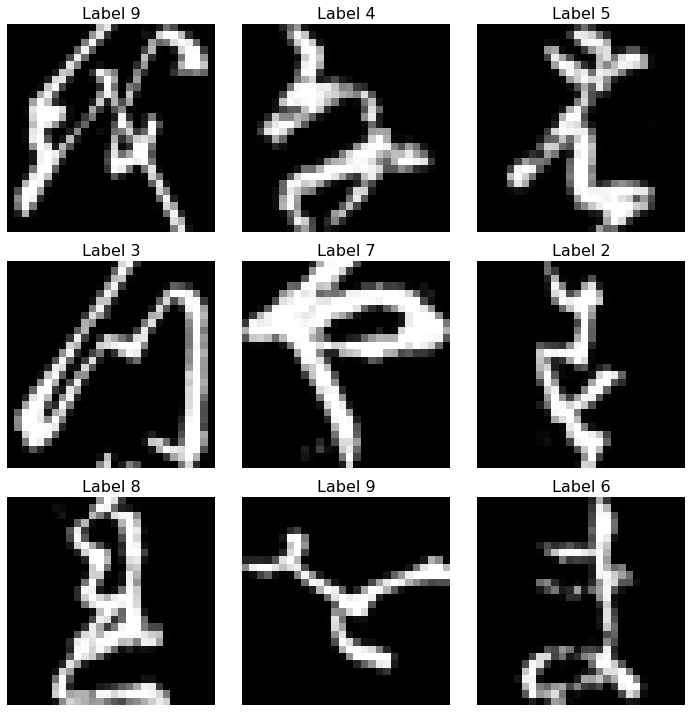

In [2]:
# load data 
X_train, y_train, X_test, y_test = data.kmnist() 

# plot data 
plot = kmnist(X_train, y_train, X_test, y_test) 
plot.train_observations(cmap='gray') 

<a name="2"></a> 

# 2. Linear Discriminant Analysis 

* [Outline](#0) 

---

## Preprocessing Image Data 

For linear discriminant analysis, the data needs to be flattened into a one-dimensional array since it does not directly work for grid-like data. Once the images are flattened, they will also be normalized. 

In [3]:
# flatten images 
X_train = image.flatten_data(X_train) 
X_test = image.flatten_data(X_test) 

# normalize images 
X_train, norm = image.normalize_train(X_train) 
X_test = image.normalize_test(X_test, norm) 

## Fit LDA: Predict and Evaluate on Train Data 

In [4]:
# define model 
model = lda.LDA(X_train, y_train) 

# train predictions 
preds_train = model.predict(X_train) 
ev_train = Classification(y_train, preds_train) 
ev_train.accuracy() 

Accuracy: 0.7743666666666666


In [5]:
# confusion matrix 
ev_train.confusion_matrix() 

Confusion Matrix:
[[5149    8   23   38  194  173    5  149  109  152]
 [   3 4432  527   22  165   26  251    9  315  250]
 [   5  287 4004   57  102   31  937   31  437  109]
 [   4  157  179 4755   81  260   71   78  377   38]
 [ 181  224  276  125 4539   40  174   99  150  192]
 [  45  151  525  264   70 4451  192   58  212   32]
 [  24  169  514   78  114   37 4823   76  149   16]
 [ 103   50  177   98  150  113   92 4917  124  176]
 [  40  253  365   42   30  130  361    8 4744   27]
 [  35  339  400   11  261   19   34   44  209 4648]]


In [6]:
# classification report 
ev_train.classification_report() 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      6000
           1       0.73      0.74      0.73      6000
           2       0.57      0.67      0.62      6000
           3       0.87      0.79      0.83      6000
           4       0.80      0.76      0.78      6000
           5       0.84      0.74      0.79      6000
           6       0.69      0.80      0.75      6000
           7       0.90      0.82      0.86      6000
           8       0.69      0.79      0.74      6000
           9       0.82      0.77      0.80      6000

    accuracy                           0.77     60000
   macro avg       0.78      0.77      0.78     60000
weighted avg       0.78      0.77      0.78     60000



## Test Predictions and Evaluation 

In [7]:
# test predictions 
y_pred = model.predict(X_test) 

# evaluation 
ev_test = Classification(y_test, y_pred) 
ev_test.accuracy() 

Accuracy: 0.589


In [8]:
# confusion matrix 
ev_test.confusion_matrix() 

Confusion Matrix:
[[630   5  13  21  53  89   2  50  95  42]
 [  2 613 146   6  29   6  84   4  62  48]
 [  5  74 628  23  28   3 103  24  82  30]
 [  1  65  71 573  16  39  37  19 155  24]
 [ 53  73  78  23 599  10  40  16  59  49]
 [  4  67 301  21  16 449  57   3  75   7]
 [  5  25 150  12  27   9 716  13  35   8]
 [ 25  46  43   7 161  16  49 436 155  62]
 [  5  54  90  13   7  41  74   2 704  10]
 [  5  91 117   0  93  22  22  19  89 542]]


In [9]:
# classification report 
ev_test.classification_report() 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.63      0.73      1000
           1       0.55      0.61      0.58      1000
           2       0.38      0.63      0.48      1000
           3       0.82      0.57      0.67      1000
           4       0.58      0.60      0.59      1000
           5       0.66      0.45      0.53      1000
           6       0.60      0.72      0.66      1000
           7       0.74      0.44      0.55      1000
           8       0.47      0.70      0.56      1000
           9       0.66      0.54      0.59      1000

    accuracy                           0.59     10000
   macro avg       0.63      0.59      0.59     10000
weighted avg       0.63      0.59      0.59     10000



Linear discriminant analysis performed fairly well when predicting training data. For the test data, there was about an 18.5% difference in accuracy indicating that the model did not construct an allocation rule general enough to perform well on new observations. The model seems to perform the worst for the fifth and seventh classes based on the confusion matrix and classification report. 

---

<a name="3"></a> 

# 3. Convolutional Neural Network 

* [Outline](#0) 

---

## Preprocessing Image Data 

The preprocessing steps for a convolutional network are different that for LDA so the data needs to be loaded one again. For CNNs, we need to ensure that there is a fourth dimension in the training and testing datasets representing the number of channels there are in the images and then the images need to be rescaled to have values between 0 and 1. The response variables (labels) need to be converted to binary vectors of binary values where the index where the 1 is represents the class label. 

In [10]:
# re-load data 
X_train, y_train, X_test, y_test = data.kmnist() 

# preprocess data 
class_labels = y_train 
n_classes = len(np.unique(y_train)) 
X_train, y_train = image.classification_data_prep(X_train, y_train) 
X_test,_ = image.classification_data_prep(X_test, y_test) 


Training data dimensions:
(60000, 28, 28, 1) (60000,)

Testing data dimensions:
(10000, 28, 28, 1) (10000,)


## Define Model 

In [11]:
# define model 
model = cnn.ConvNet(in_shape=X_train.shape[1:], n_classes=n_classes) 
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
____________________________________________________

## Fit Model 

The CNN will be trained for 10 epochs using 10% of the train data as validation data. 

In [12]:
# fit model 
model.fit(X_train, y_train, epochs=10, validation_split=0.1, shuffle=True) 

Epoch 1/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.3052 - accuracy: 0.9081 - val_loss: 0.1663 - val_accuracy: 0.9523
Epoch 2/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.1227 - accuracy: 0.9642 - val_loss: 0.1119 - val_accuracy: 0.9677
Epoch 3/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0843 - accuracy: 0.9748 - val_loss: 0.1035 - val_accuracy: 0.9677
Epoch 4/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.0893 - val_accuracy: 0.9745
Epoch 5/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0966 - val_accuracy: 0.9733
Epoch 6/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0911 - val_accuracy: 0.9757
Epoch 7/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.1017 -

## Train Predictions and Evaluation 

In [13]:
# train predictions 
preds_train = cnn.predictions(model, X_train) 

# train evaluation 
ev_train = Classification(class_labels, preds_train) 
ev_train.accuracy() 

Accuracy: 0.9951166666666666


In [14]:
# confusion matrix 
ev_train.confusion_matrix() 

Confusion Matrix:
[[5972    6    0    2    8    1    1    3    5    2]
 [   0 5986    1    0    2    1    6    1    3    0]
 [   0    3 5971    5    5    0   13    1    2    0]
 [   0    0    3 5991    1    0    2    2    0    1]
 [   3    5    2    6 5970    0    4    0    8    2]
 [   2    5    6   70    1 5896    8    1    9    2]
 [   1    9   10    8    7    1 5956    7    1    0]
 [   2    3    0    2    3    0    0 5990    0    0]
 [   0    2    0    2    1    0   10    0 5985    0]
 [   0    3    1    0    4    0    0    0    2 5990]]


In [15]:
# classification report 
ev_train.classification_report() 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       0.99      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       0.98      1.00      0.99      6000
           4       0.99      0.99      0.99      6000
           5       1.00      0.98      0.99      6000
           6       0.99      0.99      0.99      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



## Test Predictions and Evaluation 

In [16]:
# test predictions 
y_pred = cnn.predictions(model, X_test) 

# evaluation 
ev_test = Classification(y_test, y_pred) 
ev_test.accuracy() 

Accuracy: 0.9405


In [17]:
# confusion matrix 
ev_test.confusion_matrix() 

Confusion Matrix:
[[950   4   5   3  24   2   0   7   4   1]
 [  3 944   9   1   6   1  21   3   8   4]
 [  7   4 884  40  10  14  21   5   9   6]
 [  0   2  14 970   3   2   3   2   3   1]
 [ 16   4   6  19 918   2   5   4  23   3]
 [  2  12  32  14   5 899  18   2  11   5]
 [  3   6  11   9   7   2 955   5   2   0]
 [ 10   4   1   2   8   1   4 945  13  12]
 [  2   5   2   2   1   0   3   1 983   1]
 [  5   6   8   3   7   2   1   2   9 957]]


In [18]:
# classification report 
ev_test.classification_report() 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1000
           1       0.95      0.94      0.95      1000
           2       0.91      0.88      0.90      1000
           3       0.91      0.97      0.94      1000
           4       0.93      0.92      0.92      1000
           5       0.97      0.90      0.93      1000
           6       0.93      0.95      0.94      1000
           7       0.97      0.94      0.96      1000
           8       0.92      0.98      0.95      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



CNN achieved almost perfect accuracy on training data and 94.05% on new observations from the test dataset. This easily outperforms linear discriminant analysis and does a good job at generalizing the training data so accurate predictions are made with unseen data. 

The CNN has an unfair advantage compared to LDA because the convolutional layers learn feature representations of the images by repeatedly applying multiple filters through cross-correlation to the images before they are flattened and fed to the output layer which is essentially a multinomial logistic regression model. The filters are also updated through the fitting process so they can transform images such that they are each significantly different from class to class. 

---

<a name="4"></a> 

# 4. Summary and Conclusion 

[Outline](#0) 

The accuracy scores for each model for both training and testing data are summarized in the table below. 

| Model  | Train  | Test   |
| :----: | :----: | :----: |
| LDA    | 77.44  | 58.9   |
| CNN    | 99.51  | 94.05  | 